In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('C:\\Users\\Q-Admin\\Downloads\\diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
col_to_norm=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [8]:
df[col_to_norm]=df[col_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Q-Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
preg=tf.feature_column.numeric_column('Pregnancies')
gluc=tf.feature_column.numeric_column('Glucose')
bp=tf.feature_column.numeric_column('BloodPressure')
st=tf.feature_column.numeric_column('SkinThickness')
inslin=tf.feature_column.numeric_column('Insulin')
bmi=tf.feature_column.numeric_column('BMI')
dpf=tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age=tf.feature_column.numeric_column('Age')

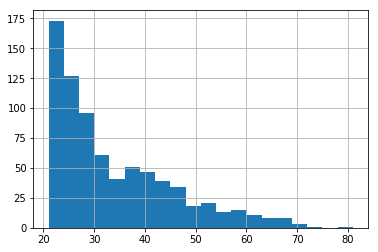

In [13]:
df.Age.hist(bins=20)

In [14]:
age_bucket=tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols=[preg,gluc,bp,st,inslin,bmi,dpf,age_bucket]

In [16]:
labels=df.Outcome
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
x=df.drop('Outcome',axis=1)

In [20]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [21]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,labels,test_size=0.3)

In [32]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,shuffle=True,num_epochs=1000)

In [33]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Q-Admin\\AppData\\Local\\Temp\\tmp6_7x38u8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000BC382F2A20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Q-Admin\AppData\Local\Temp\tmp6_7x38u8\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 439.311
INFO:tensorflow:loss = 6.242195, step = 101 (0.229 sec)
INFO:tensorflow:global_step/sec: 687.92
INFO:tensorflow:loss = 5.454091, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 733.247
INFO:tensorflow:loss = 6.4424686, step = 301 (0.137 sec)
INFO:tensorflow:global_step/sec: 725.376
INFO:tensorflow:loss = 7.1921687, step = 401 (0.138 sec)
INFO:tensorflow:global_step/sec: 695.093
INFO:tensorflow:loss = 5.0428658, step = 501 (0.145 sec)
INFO:tensorflow:global_step/sec: 664.845
INFO:tensorflow:loss = 5.61138, step = 601 (0.148 sec)
INFO:tensorflow:global_step/sec:

In [36]:
test_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [37]:
results=model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-05-09:23:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmp6_7x38u8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-05-09:23:49
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6666667, accuracy_baseline = 0.6450217, auc = 0.74365693, auc_precision_recall = 0.5746633, average_loss = 0.59320986, global_step = 1000, label/mean = 0.35497835, loss = 5.709645, precision = 0.6923077, prediction/mean = 0.31822166, recall = 0.1097561


In [38]:
print(results)

{'accuracy': 0.6666667, 'accuracy_baseline': 0.6450217, 'auc': 0.74365693, 'auc_precision_recall': 0.5746633, 'average_loss': 0.59320986, 'label/mean': 0.35497835, 'loss': 5.709645, 'precision': 0.6923077, 'prediction/mean': 0.31822166, 'recall': 0.1097561, 'global_step': 1000}


In [39]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [41]:
predictions=model.predict(pred_input_func)

In [42]:
my_pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmp6_7x38u8\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
print(my_pred)

[{'logits': array([-1.2440252], dtype=float32), 'logistic': array([0.22373612], dtype=float32), 'probabilities': array([0.7762639, 0.2237361], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object)}, {'logits': array([-0.34466457], dtype=float32), 'logistic': array([0.41467685], dtype=float32), 'probabilities': array([0.58532315, 0.41467685], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object)}, {'logits': array([-0.81178176], dtype=float32), 'logistic': array([0.30751094], dtype=float32), 'probabilities': array([0.692489  , 0.30751094], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object)}, {'logits': array([-0.00381899], dtype=float32), 'logistic': array([0.49904528], dtype=float32), 'probabilities': array([0.50095475, 0.49904525], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object)}, {'logits': array([-1.2383277], dtype=float

In [44]:
dnn_model=tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Q-Admin\\AppData\\Local\\Temp\\tmplpmqn886', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000BC38CD3630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [45]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Q-Admin\AppData\Local\Temp\tmplpmqn886\model.ckpt.
INFO:tensorflow:loss = 7.0751038, step = 1
INFO:tensorflow:global_step/sec: 436.472
INFO:tensorflow:loss = 5.776727, step = 101 (0.232 sec)
INFO:tensorflow:global_step/sec: 685.458
INFO:tensorflow:loss = 6.6499243, step = 201 (0.145 sec)
INFO:tensorflow:global_step/sec: 717.509
INFO:tensorflow:loss = 6.2532606, step = 301 (0.140 sec)
INFO:tensorflow:global_step/sec: 714.94
INFO:tensorflow:loss = 5.9792533, step = 401 (0.142 sec)
INFO:tensorflow:global_step/sec: 565.063
INFO:tensorflow:loss = 6.279845, step = 501 (0.179 sec)
INFO:tensorflow:global_step/sec: 651.857
INFO:tensorflow:loss = 5.742811, step = 601 (0.149 sec)
INFO:tensorflow:global_step/se

In [48]:
test_dnn=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [49]:
dnn_model.evaluate(test_dnn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-05-09:47:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Q-Admin\AppData\Local\Temp\tmplpmqn886\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-05-09:47:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.64069265, accuracy_baseline = 0.6450217, auc = 0.69720906, auc_precision_recall = 0.4731586, average_loss = 0.63228816, global_step = 1000, label/mean = 0.35497835, loss = 6.0857735, precision = 0.33333334, prediction/mean = 0.27881444, recall = 0.0121951215


{'accuracy': 0.64069265,
 'accuracy_baseline': 0.6450217,
 'auc': 0.69720906,
 'auc_precision_recall': 0.4731586,
 'average_loss': 0.63228816,
 'global_step': 1000,
 'label/mean': 0.35497835,
 'loss': 6.0857735,
 'precision': 0.33333334,
 'prediction/mean': 0.27881444,
 'recall': 0.0121951215}